#### student ID : 20141445

##### import librarys

In [1]:
import matplotlib.pyplot as plt
import numpy as np

##### Load dataset and define constants

In [2]:
file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images

##### Define functions <br>
normalize : $$ D' = {D - D_{min} \over D_{max} - D_{min} } $$ <br>
average (based L2 norm) : $$ result = normalize(\sqrt{\sum_{i=1}^{n} image_i^2}) $$

In [3]:
# normalize the values of the input data to be [0, 1]
def normalize(data):
    return (data - min(data))/(max(data)-min(data))

# return average of input images
def average(images):
    return normalize(np.sqrt(np.sum(np.asarray(images)**2,axis=0)))

##### Compute the average images for each label (digit) based on L2-norm.

In [4]:
# make a matrix each column of which represents an images in a vector form 
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:
    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    list_label[count]       = label
    list_image[:, count]    = im_vector    
    count += 1
    
result_images = []
for i in range(10):
    target_images = []
    for idx in range(count):
         if list_label[idx] == i:
                target_images.append(list_image[:, idx])
    result_images.append(average(target_images))

##### Visualize the average images.

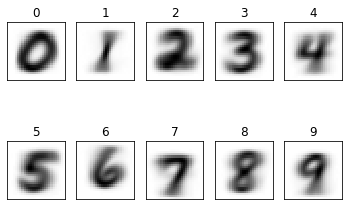

In [5]:
for i in range(10):
    im_matrix   = result_images[i].reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()